# Goal of the Project: Classification of News with Machine Learning Model: 

# In the era of internet and social media we have surrounded by n number of news. We are always searching for our favorite categories of News. Most of the News Websites, News editors are doing manual categorization of News into the different classes, Such as Sports, Entertainment, Business, Politics, Tech world..etc.. This takes long time and having threats of incorrect categorization. So, here is Machine Learning Algorithms which can help us to do this process automated. We will see how the Machine Learning would help us to News Categorization.

In [211]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

In [212]:
df = pd.read_csv('NewsDataFile.csv')

In [213]:
df.head()

,Unnamed: 0,category,filename,title,content
0,0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [214]:
df.isnull().sum()

Unnamed: 0    0
category      0
filename      0
title         0
content       0
dtype: int64

In [215]:
df.shape

(2225, 5)

In [216]:
df.columns

Index(['Unnamed: 0', 'category', 'filename', 'title', 'content'], dtype='object')

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2225 non-null   int64 
 1   category    2225 non-null   object
 2   filename    2225 non-null   object
 3   title       2225 non-null   object
 4   content     2225 non-null   object
dtypes: int64(1), object(4)
memory usage: 87.0+ KB


In [218]:
cf  = df["category"].value_counts()

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

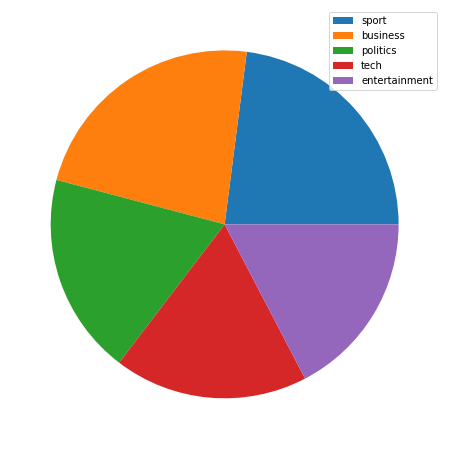

In [220]:
plt.figure(figsize=(8,8))
plt.pie(cf)

plt.legend(["sport","business", "politics", "tech","entertainment"])
plt.show

In [221]:
cf

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [222]:
x = df["title"]
x

0       Ad sales boost Time Warner profit
1        Dollar gains on Greenspan speech
2       Yukos unit buyer faces loan claim
3       High fuel prices hit BA's profits
4       Pernod takeover talk lifts Domecq
                      ...                
2220     BT program to beat dialler scams
2221      Spam e-mails tempt net shoppers
2222              Be careful how you code
2223      US cyber security chief resigns
2224     Losing yourself in online gaming
Name: title, Length: 2225, dtype: object

In [223]:
x.shape

(2225,)

In [224]:
y = df["category"]
y

0       business
1       business
2       business
3       business
4       business
          ...   
2220        tech
2221        tech
2222        tech
2223        tech
2224        tech
Name: category, Length: 2225, dtype: object

In [225]:
y.shape

(2225,)

In [226]:
cv = CountVectorizer()

In [227]:
X_data = cv.fit_transform(x)

In [228]:
print(X_data)

  (0, 116)	1
  (0, 2893)	1
  (0, 453)	1
  (0, 3400)	1
  (0, 3620)	1
  (0, 2582)	1
  (1, 1033)	1
  (1, 1425)	1
  (1, 2331)	1
  (1, 1528)	1
  (1, 3145)	1
  (2, 3749)	1
  (2, 3523)	1
  (2, 540)	1
  (2, 1238)	1
  (2, 2010)	1
  (2, 680)	1
  (3, 1635)	1
  (3, 1406)	1
  (3, 2561)	1
  (3, 1646)	1
  (3, 297)	1
  (3, 2584)	1
  (4, 2441)	1
  (4, 3320)	1
  :	:
  (2220, 514)	1
  (2220, 348)	1
  (2220, 2917)	1
  (2220, 2585)	1
  (2220, 981)	1
  (2221, 3015)	1
  (2221, 2266)	1
  (2221, 2053)	1
  (2221, 3133)	1
  (2221, 3358)	1
  (2222, 3742)	1
  (2222, 346)	1
  (2222, 715)	1
  (2222, 1693)	1
  (2222, 590)	1
  (2223, 3543)	1
  (2223, 656)	1
  (2223, 2764)	1
  (2223, 2958)	1
  (2223, 868)	1
  (2224, 1732)	1
  (2224, 2334)	1
  (2224, 1436)	1
  (2224, 2026)	1
  (2224, 3746)	1


In [229]:
x_arr = np.array(df["title"])
y_arr = np.array(df["category"])

In [230]:
x_arr

array(['Ad sales boost Time Warner profit',
       'Dollar gains on Greenspan speech',
       'Yukos unit buyer faces loan claim', ...,
       'Be careful how you code', 'US cyber security chief resigns',
       'Losing yourself in online gaming'], dtype=object)

In [231]:
y_arr

array(['business', 'business', 'business', ..., 'tech', 'tech', 'tech'],
      dtype=object)

In [232]:
X_arr_data = cv.fit_transform(x_arr)

In [233]:
print(X_arr_data)

  (0, 116)	1
  (0, 2893)	1
  (0, 453)	1
  (0, 3400)	1
  (0, 3620)	1
  (0, 2582)	1
  (1, 1033)	1
  (1, 1425)	1
  (1, 2331)	1
  (1, 1528)	1
  (1, 3145)	1
  (2, 3749)	1
  (2, 3523)	1
  (2, 540)	1
  (2, 1238)	1
  (2, 2010)	1
  (2, 680)	1
  (3, 1635)	1
  (3, 1406)	1
  (3, 2561)	1
  (3, 1646)	1
  (3, 297)	1
  (3, 2584)	1
  (4, 2441)	1
  (4, 3320)	1
  :	:
  (2220, 514)	1
  (2220, 348)	1
  (2220, 2917)	1
  (2220, 2585)	1
  (2220, 981)	1
  (2221, 3015)	1
  (2221, 2266)	1
  (2221, 2053)	1
  (2221, 3133)	1
  (2221, 3358)	1
  (2222, 3742)	1
  (2222, 346)	1
  (2222, 715)	1
  (2222, 1693)	1
  (2222, 590)	1
  (2223, 3543)	1
  (2223, 656)	1
  (2223, 2764)	1
  (2223, 2958)	1
  (2223, 868)	1
  (2224, 1732)	1
  (2224, 2334)	1
  (2224, 1436)	1
  (2224, 2026)	1
  (2224, 3746)	1


In [234]:
BNB_arr = BernoulliNB()
BNB_arr.fit(x_arr_train,y_arr_train)
y_arr_pred= BNB_arr.predict(x_arr_test)
BNB_arr.score(x_arr_test, y_arr_test)

0.7640449438202247

In [235]:
RFC_arr = RandomForestClassifier()
RFC_arr.fit(x_arr_train,y_arr_train)
y_arr_pred= RFC_arr.predict(x_arr_test)
RFC_arr.score(x_arr_test, y_arr_test)

0.6853932584269663

In [236]:
RFC_arr = RandomForestClassifier(n_estimators=200, criterion='entropy')
RFC_arr.fit(x_arr_train,y_arr_train)
y_arr_pred= RFC_arr.predict(x_arr_test)
RFC_arr.score(x_arr_test, y_arr_test)

0.6966292134831461

In [237]:
SVC_arr = SVC()
SVC_arr.fit(x_arr_train,y_arr_train)
y_arr_pred= SVC_arr.predict(x_arr_test)
SVC_arr.score(x_arr_test, y_arr_test)

0.7752808988764045

In [238]:
SVC_arr = SVC(C=1.0,kernel = 'linear', gamma='auto')
SVC_arr.fit(x_arr_train,y_arr_train)
y_arr_pred= SVC_arr.predict(x_arr_test)
SVC_arr.score(x_arr_test, y_arr_test)

0.802247191011236

In [239]:
DTC_arr = DecisionTreeClassifier()
DTC_arr.fit(x_arr_train,y_arr_train)
y_arr_pred= DTC_arr.predict(x_arr_test)
DTC_arr.score(x_arr_test, y_arr_test)

0.6853932584269663

In [240]:
DTC_arr = DecisionTreeClassifier(criterion = "entropy")
DTC_arr.fit(x_arr_train,y_arr_train)
y_arr_pred= DTC_arr.predict(x_arr_test)
DTC_arr.score(x_arr_test, y_arr_test)

0.6696629213483146

In [241]:
XGBC_arr = xgb.XGBClassifier()
XGBC_arr.fit(x_arr_train,y_arr_train)
y_arr_pred= XGBC_arr.predict(x_arr_test)
XGBC_arr.score(x_arr_test, y_arr_test)

C:\Users\Om\anaconda3\envs\DS-ML-Projects\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:57:58] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7078651685393258

In [242]:
XGBC_arr = xgb.XGBClassifier(n_estimators = 100, gamma = 0.2)
XGBC_arr.fit(x_arr_train,y_arr_train)
y_arr_pred= XGBC_arr.predict(x_arr_test)
XGBC_arr.score(x_arr_test, y_arr_test)


C:\Users\Om\anaconda3\envs\DS-ML-Projects\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:57:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7101123595505618

In [243]:
ABC_arr = AdaBoostClassifier()
ABC_arr.fit(x_arr_train,y_arr_train)
y_arr_pred= ABC_arr.predict(x_arr_test)
ABC_arr.score(x_arr_test, y_arr_test)

0.5078651685393258

In [244]:
ABC_arr = AdaBoostClassifier( n_estimators=150, learning_rate=1.0, algorithm='SAMME.R')
ABC_arr.fit(x_arr_train,y_arr_train)
y_arr_pred= ABC_arr.predict(x_arr_test)
ABC_arr.score(x_arr_test, y_arr_test)

0.6359550561797753

In [245]:
MNB.score(x_test, y_test)

0.8044943820224719

In [246]:
x_arr_train, x_arr_test, y_arr_train, y_arr_test = train_test_split(X_arr_data, y_arr, test_size=0.2, random_state=51)

In [247]:
print("Shape of x_arr_train>> ",x_arr_train.shape)
print("Shape of y_arr_train>> ",y_arr_train.shape)
print("Shape of x_arr_test>> ",x_arr_test.shape)
print("Shape of y_arr_test>> ",y_arr_test.shape)

Shape of x_arr_train>>  (1780, 3754)
Shape of y_arr_train>>  (1780,)
Shape of x_arr_test>>  (445, 3754)
Shape of y_arr_test>>  (445,)


In [248]:
MNB_arr = MultinomialNB()

In [249]:
MNB_arr.fit(x_arr_train,y_arr_train)

MultinomialNB()

In [250]:
y_arr_pred= MNB_arr.predict(x_arr_test)

In [251]:
cm_arr = confusion_matrix(y_arr_test, y_arr_pred, labels=MNB_arr.classes_)
disp_arr = ConfusionMatrixDisplay(confusion_matrix=cm_arr, display_labels=MNB_arr.classes_)

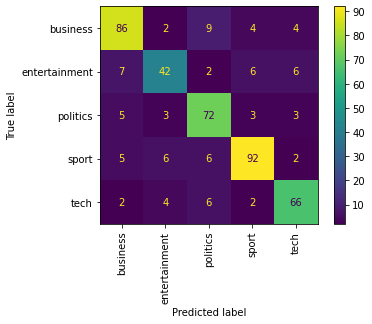

<Figure size 720x1440 with 0 Axes>

In [252]:
disp_arr.plot(xticks_rotation='vertical')
plt.figure(figsize=(10,20))
plt.show()

In [253]:
MNB_arr.score(x_arr_test, y_arr_test)

0.8044943820224719

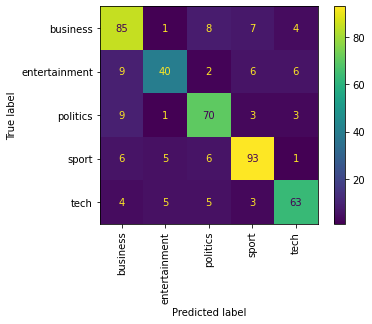

<Figure size 720x1440 with 0 Axes>

In [254]:
MNB_arr = MultinomialNB(alpha = 5.0)
MNB_arr.fit(x_arr_train,y_arr_train)
y_arr_pred= MNB_arr.predict(x_arr_test)
cm_arr = confusion_matrix(y_arr_test, y_arr_pred, labels=MNB_arr.classes_)
disp_arr = ConfusionMatrixDisplay(confusion_matrix=cm_arr, display_labels=MNB_arr.classes_)
disp_arr.plot(xticks_rotation='vertical')
plt.figure(figsize=(10,20))
plt.show()

In [255]:
MNB_arr.score(x_arr_test, y_arr_test)

0.7887640449438202

In [256]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=51)

In [257]:
print(x_train)

  (0, 3674)	1
  (0, 341)	1
  (0, 347)	1
  (0, 470)	1
  (0, 2894)	1
  (1, 262)	1
  (1, 2928)	1
  (1, 3051)	1
  (1, 500)	1
  (1, 3461)	1
  (2, 3543)	1
  (2, 3407)	1
  (2, 2336)	1
  (2, 171)	1
  (2, 3274)	1
  (2, 466)	1
  (2, 1876)	1
  (3, 2172)	1
  (3, 2319)	1
  (3, 1435)	1
  (3, 139)	1
  (3, 725)	1
  (4, 1361)	1
  (4, 2985)	1
  (4, 1464)	1
  :	:
  (1775, 3386)	1
  (1775, 2388)	1
  (1775, 576)	1
  (1775, 2094)	1
  (1776, 2820)	1
  (1776, 1621)	1
  (1776, 2371)	1
  (1776, 2869)	1
  (1777, 3366)	1
  (1777, 1084)	1
  (1777, 1899)	1
  (1777, 1244)	1
  (1778, 1741)	1
  (1778, 3536)	1
  (1778, 1301)	1
  (1778, 2736)	1
  (1778, 1260)	1
  (1778, 1615)	1
  (1779, 3407)	1
  (1779, 1059)	1
  (1779, 1091)	1
  (1779, 1631)	1
  (1779, 3345)	1
  (1779, 1903)	1
  (1779, 3029)	1


In [258]:
y_train

656     entertainment
762     entertainment
684     entertainment
2134             tech
2128             tech
            ...      
1460            sport
1733            sport
1760            sport
485          business
2105             tech
Name: category, Length: 1780, dtype: object

In [259]:
print("Shape of x_train>> ",x_train.shape)
print("Shape of y_train>> ",y_train.shape)
print("Shape of x_test>> ",x_test.shape)
print("Shape of y_test>> ",y_test.shape)

Shape of x_train>>  (1780, 3754)
Shape of y_train>>  (1780,)
Shape of x_test>>  (445, 3754)
Shape of y_test>>  (445,)


In [260]:
MNB = MultinomialNB()

In [261]:
MNB.fit(x_train,y_train)

MultinomialNB()

In [262]:
y_pred= MNB.predict(x_test)

In [263]:
y_pred

array(['sport', 'sport', 'business', 'tech', 'tech', 'tech', 'sport',
       'entertainment', 'tech', 'business', 'business', 'business',
       'business', 'sport', 'entertainment', 'sport', 'entertainment',
       'politics', 'politics', 'politics', 'business', 'politics',
       'entertainment', 'sport', 'business', 'business', 'sport', 'sport',
       'politics', 'politics', 'business', 'politics', 'business', 'tech',
       'sport', 'business', 'entertainment', 'business', 'sport', 'tech',
       'entertainment', 'sport', 'business', 'tech', 'entertainment',
       'business', 'sport', 'entertainment', 'business', 'business',
       'business', 'sport', 'sport', 'politics', 'tech', 'entertainment',
       'politics', 'sport', 'politics', 'tech', 'politics', 'business',
       'politics', 'politics', 'sport', 'business', 'business', 'sport',
       'business', 'sport', 'politics', 'entertainment', 'tech',
       'entertainment', 'sport', 'politics', 'politics', 'business',
       '

In [264]:
from sklearn.metrics import confusion_matrix

In [265]:
print(confusion_matrix(y_test, y_pred, labels=["sport","business", "politics", "tech","entertainment"]))

[[92  5  6  2  6]
 [ 4 86  9  4  2]
 [ 3  5 72  3  3]
 [ 2  2  6 66  4]
 [ 6  7  2  6 42]]


In [266]:
from sklearn.metrics import ConfusionMatrixDisplay


In [267]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))

In [268]:
cm = confusion_matrix(y_test, y_pred, labels=MNB.classes_)


In [269]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=MNB.classes_)


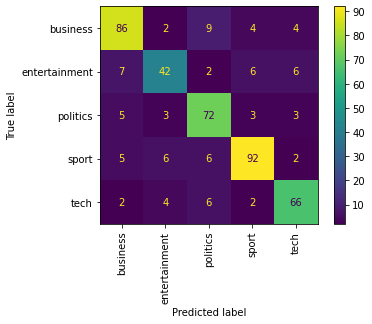

<Figure size 720x1440 with 0 Axes>

In [270]:
disp.plot(xticks_rotation='vertical')
plt.figure(figsize=(10,20))
plt.show()

In [272]:
userdata = input("Enter a Text: ")
inputdata = cv.transform([userdata]).toarray()
output = MNB.predict(inputdata)
print(output)

Enter a Text: Cricket-England's Root has Ashes century in his sights in Melbourne; Golf - Ladies European Tour to have record prize purse in 2022 and more
['sport']


# Conclusion: Project Summary:  


# Here we got the magic of automated categorization of News in multiple classes. We just need to select the correct categories to have a look on the favorite classes. Even though New Websites , News Editors or News Publishers can use this automatic machine learning technique to get categorization. Note: Please note, this Machine Learning algorithm is only for Learning Purpose.